<a href="https://colab.research.google.com/github/malcolmrite-dsi/CPT-House-Predictions/blob/master/Data_Cleaning_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [44]:
#Importing One Hot Encoding libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Importing the Datasets

## Property 24 Dataset

In [6]:
p24_df = pd.read_csv("drive/My Drive/cpt-houseprices_p24.csv")
p24_df.head()

,Description,Suburb,Price
0,2 Bedroom Apartment,Muizenberg,R 1 425 000
1,5 Bedroom House,Pinelands,R 3 200 000
2,3 Bedroom Apartment,Diep River,R 19 500 000
3,6 Bedroom House,Cape Town City Centre,R 4 495 000
4,3 Bedroom House,Kenilworth,R 6 995 000


# Feature Engineering

In [5]:
def featureGeneration(df):
  Bedrooms = []
  HouseType = []
  for i, descr in enumerate(df["Description"]):
    desc = str(descr).split()
    if desc[0].isdigit():
      Bedrooms.append(desc[0]) 
      HouseType.append(desc[-1])
    else:
      df.drop(i, inplace = True)
  
  df.insert(loc = 1, column = "Bedrooms", value = Bedrooms)
  df.insert(loc = 2, column = "HouseType", value = HouseType)
  return df

In [7]:
p24_df = featureGeneration(p24_df)
p24_df.head()

,Description,Bedrooms,HouseType,Suburb,Price
0,2 Bedroom Apartment,2,Apartment,Muizenberg,R 1 425 000
1,5 Bedroom House,5,House,Pinelands,R 3 200 000
2,3 Bedroom Apartment,3,Apartment,Diep River,R 19 500 000
3,6 Bedroom House,6,House,Cape Town City Centre,R 4 495 000
4,3 Bedroom House,3,House,Kenilworth,R 6 995 000


In [8]:
p24_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655 entries, 0 to 749
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  655 non-null    object
 1   Bedrooms     655 non-null    object
 2   HouseType    655 non-null    object
 3   Suburb       655 non-null    object
 4   Price        655 non-null    object
dtypes: object(5)
memory usage: 30.7+ KB


In [12]:
p24_df.drop("Description", axis = 1, inplace=True)
p24_df.head()

,Bedrooms,HouseType,Suburb,Price
0,2,Apartment,Muizenberg,1425000
1,5,House,Pinelands,3200000
2,3,Apartment,Diep River,19500000
3,6,House,Cape Town City Centre,4495000
4,3,House,Kenilworth,6995000


# Data Type Changes

In [9]:
def fixPrice(df):
  
  for i, price in enumerate(df["Price"]):
    numbers = []
    for character in str(price).split():
      if character.isdigit():
        numbers.append(character)
  
    df["Price"].iloc[i] = (''.join([str(elem) for elem in numbers]))
  return df

In [10]:
def catDataType(data):
  for feature in data.columns:
    if data[feature].dtype == "object":
      data[feature] = data[feature].astype('category')

  return data

In [11]:
p24_df = fixPrice(p24_df)
p24_df.head()

,Description,Bedrooms,HouseType,Suburb,Price
0,2 Bedroom Apartment,2,Apartment,Muizenberg,1425000
1,5 Bedroom House,5,House,Pinelands,3200000
2,3 Bedroom Apartment,3,Apartment,Diep River,19500000
3,6 Bedroom House,6,House,Cape Town City Centre,4495000
4,3 Bedroom House,3,House,Kenilworth,6995000


In [13]:
p24_df.Price = p24_df.Price.replace('',None)

In [16]:
p24_df.Price = p24_df.Price.astype(float)
p24_df.Bedrooms = p24_df.Bedrooms.astype(int)
p24_df.head()

,Bedrooms,HouseType,Suburb,Price
0,2,Apartment,Muizenberg,1425000.0
1,5,House,Pinelands,3200000.0
2,3,Apartment,Diep River,19500000.0
3,6,House,Cape Town City Centre,4495000.0
4,3,House,Kenilworth,6995000.0


In [17]:
p24_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655 entries, 0 to 749
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bedrooms   655 non-null    int64  
 1   HouseType  655 non-null    object 
 2   Suburb     655 non-null    object 
 3   Price      655 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 25.6+ KB


In [18]:
p24_df = catDataType(p24_df)

In [22]:
p24_df.Suburb.value_counts()

Sea Point                58
Cape Town City Centre    36
Rondebosch               29
Constantia               26
Claremont Upper          25
                         ..
Rondebosch Village        1
Fairways                  1
Factreton                 1
Dreyersdal Estate         1
Adriaanse                 1
Name: Suburb, Length: 103, dtype: int64

# Missing Data Code

In [19]:
#Check Missing Values in a Dataset
def NACount(data):
  NaCount = {}
  for feature in data.columns:
    NaCount[feature] = data[feature].isna().sum()

  return NaCount

In [20]:
#Check Unique Values in Training Data
def UniqueCount(data):
  UnCount = {}
  for feature in data.columns:
    UnCount[feature] = data[feature].unique()

  return UnCount

In [42]:
print(NACount(p24_df))

{'Bedrooms': 0, 'HouseType': 0, 'Suburb': 0, 'Price': 0}


# Data Exploration

In [24]:
p24_df.describe()

,Bedrooms,Price
count,655.000000,6.550000e+02
mean,2.839695,5.237445e+06
std,1.678324,6.743300e+06
min,1.000000,1.990000e+05
25%,2.000000,1.750000e+06
50%,3.000000,2.850000e+06
75%,3.000000,5.900000e+06
max,18.000000,6.900000e+07


## Exploratory Data Analysis Function

In [39]:
#Defining graphing function
def ExploreGraphs(x_feature, y_result, df, choice, custom):
  
  #Setting the visual features of the graph
  sns.set_style("darkgrid")
  plt.figure(figsize=(20,10))
  
  #Bar Chart choice
  if choice == "bar":

    barplot = sns.barplot(x = x_feature, y = y_result, data = df, ci=custom)
    plt.xticks(rotation=90)
    plt.show()

  #Boxplot Choice
  elif choice == "box":

    boxplot = sns.boxplot(x= x_feature, y = y_result, data = df)
    plt.xticks(rotation=90)
    plt.show()

  #Histogram choice
  elif choice == "hist":

    histplot = sns.distplot(df[x_feature])
    plt.show()

  #Count Plot Choice
  elif choice == "count":

    barplot = sns.countplot(x = x_feature, data = df)
    plt.show()

  #Heat map choice
  elif choice == "heat":

    plt.figure(figsize=(30,30))
    sns.heatmap(df.corr(), vmax=0.8, square=True, annot = True)

  #Pair plot choice
  elif choice == "pair":

    sns.pairplot(df)

  #In case the choice input is not defined in the function
  else:
    print("Not a valid choice")

## Graphing Area

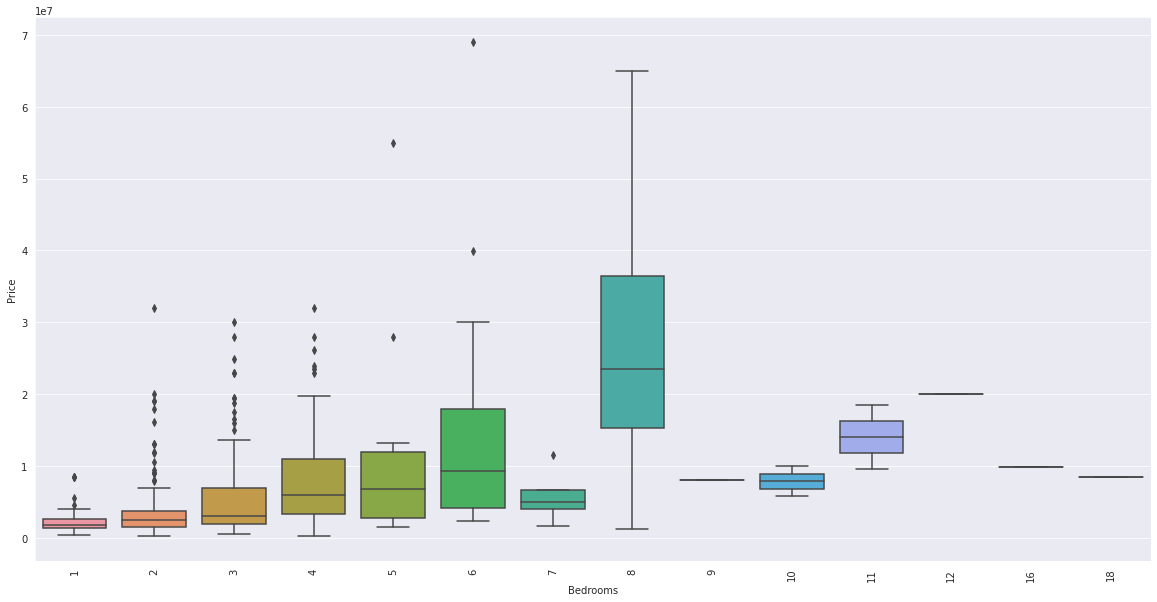

In [48]:
'''
How to use function
FIRST PARAMETER: X Feature (Pandas Column Name)

SECOND PARAMETER: Y FEATURE (Pandas Column Name)

THIRD PARAMETER: DATA (Pandas Dataframe)

FOURTH PARAMETER: Choice of graph: "bar" for Bar Plot (Good for comparing one numeric feature with a feature),
                                    "box" for Box Plot (Good for comparing one insurance product with a feature),
                                    "hist" for Histogram (Good for continuous distrbution of one feature),
                                    "count" for a count plot (Good for the discontinuous distribution of one feature),
                                    "heat" for a heatmap between the variables of the dataset,
                                    "pair" for a pairplot between the variables of a dataset (Be careful of the number of features you're comparing)

FIFTH PARAMETER: Confidence Interval error bar for Bar Plot = number (number% Confidence Interval), None (No error bar) 
'''
ExploreGraphs("Bedrooms", "Price", p24_df, "box", 95)

# Encoding the Data

In [ ]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False), [0,1,2,3,5])], remainder='passthrough')
train_data_features = (ct.fit_transform(train_data_features))
test_data_features = (ct.fit_transform(test_data_features))